### Use 'Algerian Forest Fire' dataset to predict 'FWI' using Lasso, Ridge and Elastic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##  Cleaned 'Algerian Forest Fire' data is loaded
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
##drop month,day and year. Since they have not much use.
df.drop(['day','month','year'],axis=1,inplace=True)
# axis=1: means column
# inplace=True: permanent changes in current data frame
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [5]:
# Checking number of classes in the dataset
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [6]:
## Encoding. That is converting 'fire' to 1 and 'not fire' to 0
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2.0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2.0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,2.0


In [7]:
## Independent And dependent features division
# Using linear regression we are predicted 'FWI' values. So it is dependent feature.
X=df.drop('FWI',axis=1)# only independent features 
y=df['FWI']# only dependent feature

In [8]:
## Dividing training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
# If two python file have smae random_state value then their train and test dataset will be same
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

### Feature Selection based on correlaltion
- Feature is selected based on correlation. If two features is highly correlated (suppose 0.9 or 0.95 correlation value) then only one is selected. 
- If dependent and indepedent features are higly correlated then that is fine. But if independent features are highly correlated then multi-colinearity problem aries. So features have to be dropped.

In [9]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot: >

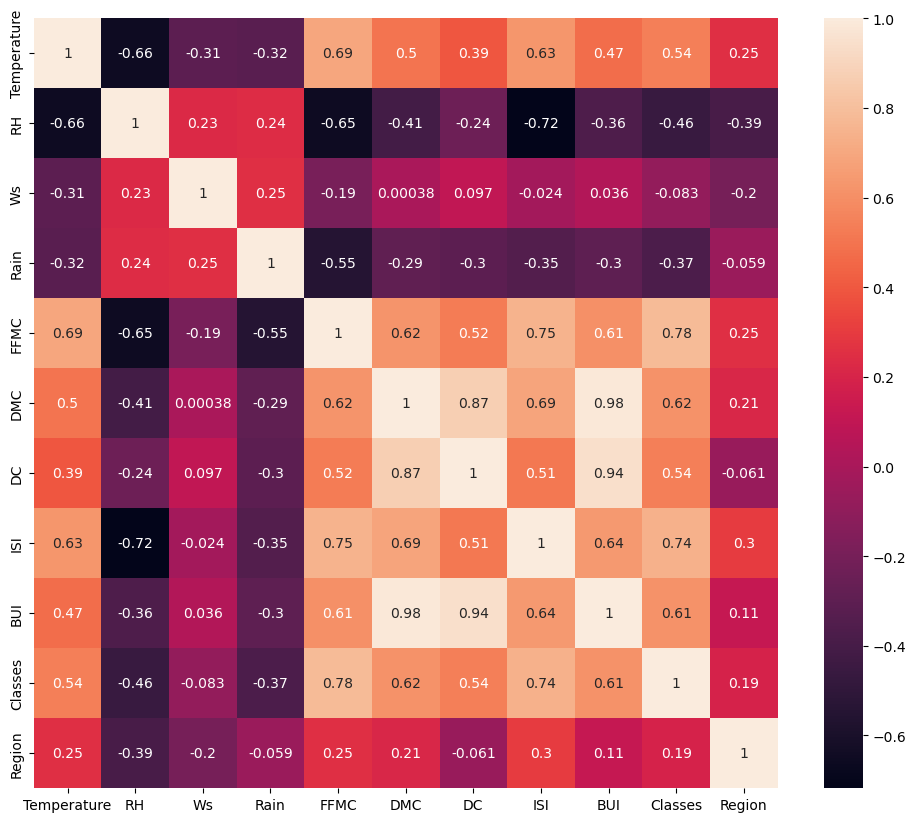

In [10]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

### Make feature selection function based on correlation
- A threshold correlation value is set.
- If correlation between two features are more than threshold correlation value then one feature is dropped. 
- The correlation values are taken from correlation table.

In [11]:
print(X_train.corr().columns)
m = X_train.corr()
m.iloc[1,2]

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')


0.22573610166999994

In [17]:
def feature_selection(dataset,threshold):
    col_corr = set() # So that duplicate values does not get stored
    corr_matrix = dataset.corr() # correlation table in data frame format is generated
    for i in range(len(corr_matrix.columns)):# Taking each column index number from correlation table
        for j in range(i): # taking each row index number from the column from correlation table
            if abs(corr_matrix.iloc[i,j])>threshold:# abs(): takes care of -ve correlation value
                # iloc[i,j]: Accessing values in data frame i--> column index number,j-->row index number.
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## threshold--Domain expertise
corr_features=feature_selection(X_train,0.85) # threshold correlattion value is 0.85
print('Highly correlated features:',corr_features)

Highly correlated features: {'DC', 'BUI'}


In [21]:
## Correlation between highly correlated features
print(X_train.corr().loc['DC','BUI'])

0.9424144019919156


### Feature Scaling Or Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Box Plots To understand Effect Of Standard Scaler

/tmp/ipykernel_133/94854981.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

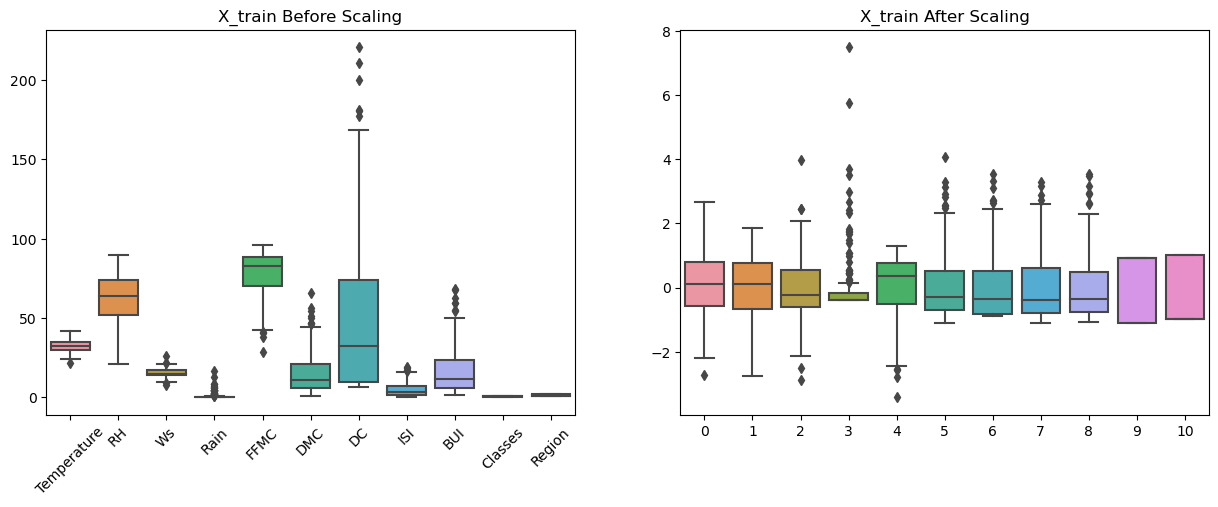

In [29]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.xticks(rotation = 45)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

Mean absolute error 0.46544608000941
R2 Score 0.9893850294922101


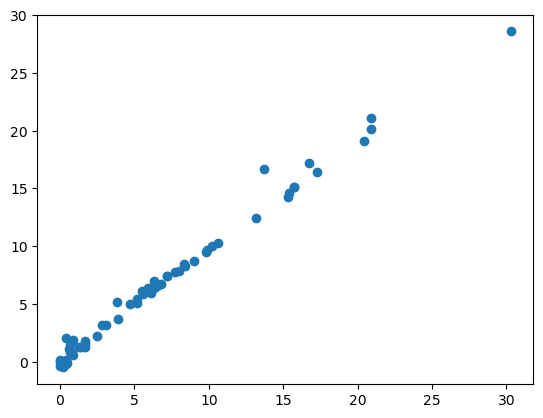

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 1.0816323165898813
R2 Score 0.9548117077009715


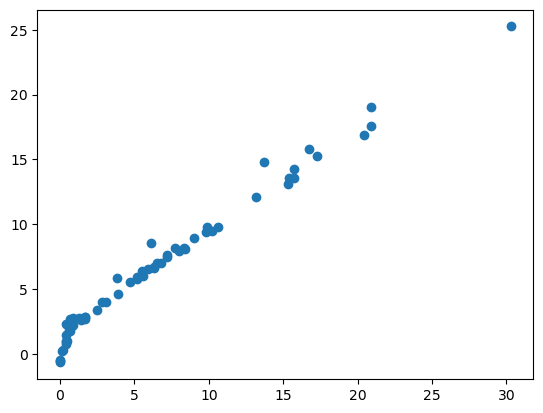

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

Mean absolute error 0.5053525521628115
R2 Score 0.9873482065539131


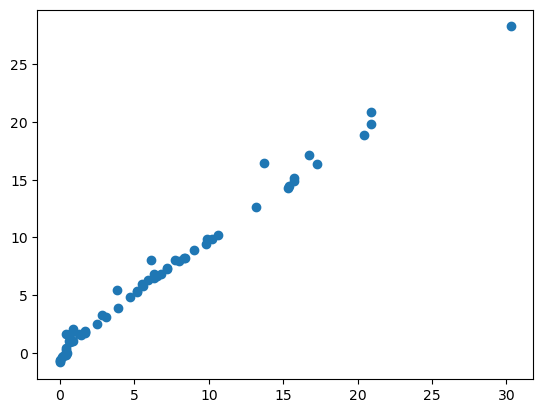

In [32]:
# Lasso regression is used with cross validation.
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)# 5 - fold cross validation
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regression model

Mean absolute error 0.503285697341684
R2 Score 0.9871729594175267


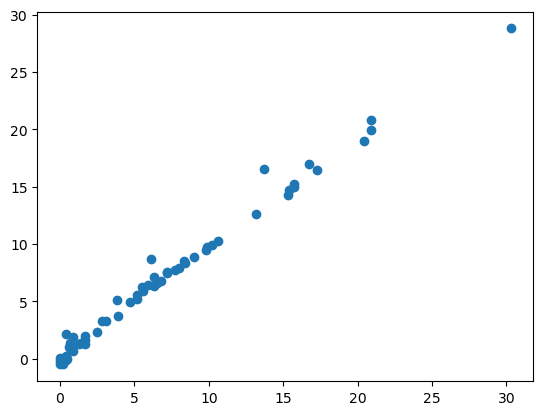

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Cross Validation Ridge

Mean absolute error 0.503285697341684
R2 Score 0.9871729594175267


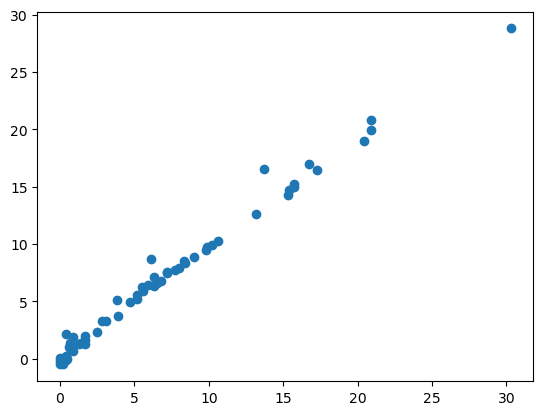

In [34]:
## Ridge regression with cross vaidation
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5) #5-fold cross validation
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [35]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression

Mean absolute error 1.6830954467418584
R2 Score 0.900671789556956


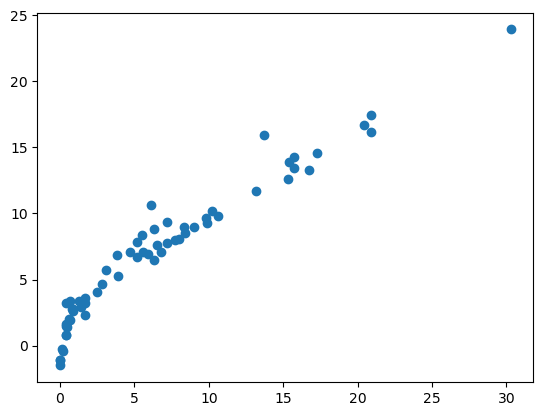

In [36]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Cross Validation ElasticNet

Mean absolute error 0.5891683480603583
R2 Score 0.9833493614806597


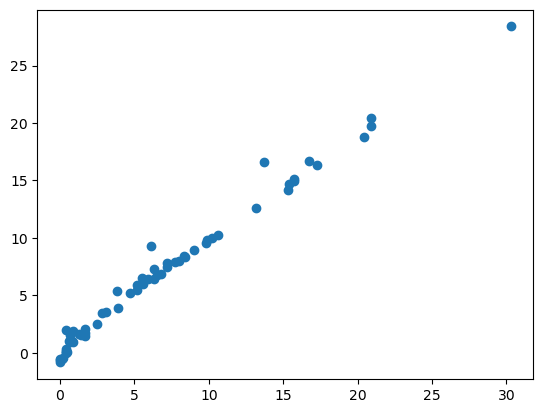

In [37]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [38]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

## Storing Machine Learning and Standard Scaler model

In [40]:
import pickle
pickle.dump(scaler,open('Ridge_scaler.pkl','wb'))# Storing Standard Scaler
pickle.dump(ridge,open('Ridge.pkl','wb'))# Storing Ridge regression